In [1]:
from stir_to_mesa import *
import os.path
from skynet_tools.nucleo import *
import flashbang as fb
import nucleosynth.nucleo as sky
import xarray as xr
import numpy as np
import progs.progs as progs
import matplotlib.pyplot as plt

# Hide the yt output
import yt
yt.set_log_level(50)

In [2]:
progenitor = progs.ProgModel(9.0, "sukhbold_2016")
progenitor.composition
#progenitor.profile["radius"]

,neutrons,h1,he3,he4,c12,n14,o16,ne20,mg24,si28,s32,ar36,ca40,ti44,cr48,fe52,fe54,ni56
0,1.241894e-04,8.464101e-08,2.128006e-10,0.000141,1.846308e-10,2.195402e-11,2.561607e-10,2.544486e-10,3.360622e-08,0.000002,0.000004,0.000042,0.031174,0.091963,0.149682,2.678802e-12,0.726868,7.869591e-16
1,1.238001e-04,8.491987e-08,2.103728e-10,0.000142,1.842529e-10,2.196929e-11,2.560542e-10,2.595555e-10,3.503264e-08,0.000002,0.000004,0.000043,0.031961,0.094426,0.152689,2.826435e-12,0.720609,8.351928e-16
2,1.236191e-04,8.537872e-08,2.093568e-10,0.000143,1.846252e-10,2.205909e-11,2.562717e-10,2.635113e-10,3.608955e-08,0.000002,0.000005,0.000044,0.032457,0.096102,0.154801,2.954671e-12,0.716324,8.783373e-16
3,1.235228e-04,8.601227e-08,2.084565e-10,0.000144,1.852869e-10,2.219724e-11,2.568225e-10,2.688039e-10,3.746876e-08,0.000002,0.000005,0.000045,0.033082,0.098182,0.157371,3.117318e-12,0.711046,9.333358e-16
4,1.228771e-04,8.662985e-08,2.060642e-10,0.000145,1.855012e-10,2.226185e-11,2.567389e-10,2.740778e-10,3.907658e-08,0.000002,0.000005,0.000046,0.033784,0.100742,0.160654,3.343828e-12,0.704498,1.011385e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,1.807012e-39,6.763725e-01,4.115719e-05,0.308563,1.502579e-03,2.584968e-03,5.898765e-03,1.306882e-03,7.916153e-04,0.000829,0.000423,0.000113,0.000074,0.000004,0.000034,1.869252e-75,0.001461,0.000000e+00
1405,1.807359e-39,6.765023e-01,4.116510e-05,0.308433,1.502828e-03,2.583722e-03,5.899858e-03,1.306881e-03,7.916146e-04,0.000829,0.000423,0.000113,0.000074,0.000004,0.000034,1.753244e-75,0.001461,0.000000e+00
1406,1.807672e-39,6.766196e-01,4.117225e-05,0.308315,1.503054e-03,2.582597e-03,5.900845e-03,1.306880e-03,7.916141e-04,0.000829,0.000423,0.000113,0.000074,0.000004,0.000034,1.652701e-75,0.001461,0.000000e+00
1407,1.808005e-39,6.767443e-01,4.117984e-05,0.308190,1.503293e-03,2.581400e-03,5.901894e-03,1.306879e-03,7.916135e-04,0.000829,0.000423,0.000113,0.000074,0.000004,0.000034,1.550603e-75,0.001461,0.000000e+00


In [3]:
run_date = "14may19"
base_path = f"/mnt/research/SNAPhU/STIR/run_sukhbold/run_{run_date}"
alphas = np.array([1.25])
masses = np.array([9.0, 9.25, 9.5, 9.75, 10.0, 10.25, 10.5, 10.75, 11.0, 11.25, 11.5, 11.75, 
                   12.0, 12.25, 12.5, 12.75, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 
                   13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 
                   15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 
                   16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 
                   17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0, 18.1, 18.2, 18.3, 18.4, 18.5, 
                   18.6, 18.7, 18.8, 18.9, 19.0, 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 
                   19.8, 19.9, 20.0, 20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 
                   21.0, 21.1, 21.2, 21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22.0, 22.1, 
                   22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23.0, 23.1, 23.2, 23.3, 
                   23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24.0, 24.1, 24.2, 24.3, 24.4, 24.5, 
                   24.6, 24.7, 24.8, 24.9, 25.0, 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.7, 
                   25.8, 25.9, 26.0, 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 
                   27.0, 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28.0, 28.1, 
                   28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29.0, 29.1, 29.2, 29.3, 
                   29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30.0, 31.0, 32.0, 33.0, 35.0, 40.0, 
                   45.0, 50.0, 55.0, 60.0, 70.0, 80.0, 100.0, 120.0])

In [ ]:
model_paths = []
model_names = []

# Iterate over every alpha and mass value
for alpha in alphas:
    for mass in masses:

        # Construct a path to the model's checkpoints folder
        mass_string = f"{mass}" if mass < 31 else f"{mass:.0f}"
        model_path = f"{base_path}_a{alpha}/run_{mass_string}"
        if not(os.path.exists(model_path)):
            print(f"Path '{model_path}' does not exist. Skipping.")
            continue

        # Construct the model name
        model_name = f"stir2_{run_date}_s{mass_string}_alpha{alpha}"

        # Add found models to lists
        model_paths.append(model_path)
        model_names.append(model_name)

: 

In [ ]:
mass = 9.5
alpha = 1.25

profile = fb.load_save.get_multiprofile(
       run = f"stir2_{run_date}_s{mass}_alpha{alpha}", 
       model = f"run_{mass}",
       model_set = f"run_{run_date}_a{alpha}",
       config = "stir", reload = False
)

tracers = fb.load_save.get_tracers(
       run = f"stir2_{run_date}_s{mass}_alpha{alpha}", 
       model = f"run_{mass}",
       model_set = f"run_{run_date}_a{alpha}",
       config = "stir", reload = False
)

output = sky.do_nucleosynthesis(
    model_path = f"/mnt/research/SNAPhU/STIR/run_sukhbold/run_{run_date}_a{alpha}/run_{mass}", 
    stir_model = f"stir2_{run_date}_s{mass}_alpha{alpha}", 
    progenitor = progenitor,
    tracers = tracers,
    output_path = f"./nucleosynthesis/{run_date}_a{alpha}_run_{mass}",
    verbose = True
)

Searching for chk files: /mnt/research/SNAPhU/STIR/run_sukhbold/run_14may19_a1.25/run_9.5/output/stir2_14may19_s9.5_alpha1.25_hdf5_chk_****
Loading multiprofile cache: /mnt/home/jdelker/_main/tools/flashbang/cache/run_14may19_a1.25/run_9.5/run_9.5_stir2_14may19_s9.5_alpha1.25_multiprofile.nc
Loading tracers cache: /mnt/home/jdelker/_main/tools/flashbang/cache/run_14may19_a1.25/run_9.5/run_9.5_stir2_14may19_s9.5_alpha1.25_tracers.nc
1
2
3
4
5
6
7
8
9


In [ ]:
#for chk in range(len(profile.coords["chk"])):
#plt.plot(profile.coords["time"], profile["mass"][-1, :], label = "mass");
#plt.plot(profile.coords["zone"], np.log10(profile["dens"][-1, :]) - 11, label = "dens");
#    break
#plt.legend();

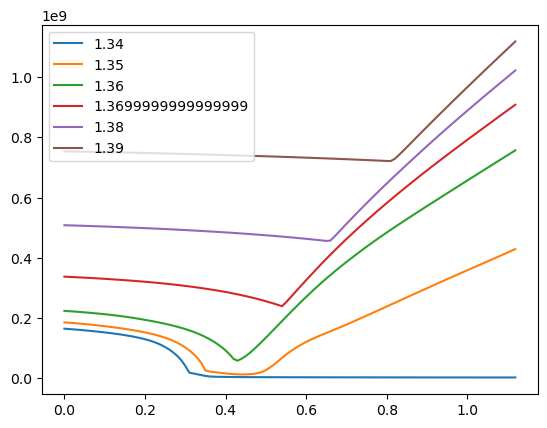

In [ ]:
#for mass in range(len(tracers.coords["mass"])):
#    plt.plot(tracers.coords["time"], tracers["r"][:, mass], label = tracers.coords["mass"].values[[mass]]);
#plt.legend();